### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

* 函数调用说明 numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [2]:
# 目标函数𝑦=𝑠𝑖𝑛2𝜋𝑥——在几个频率值下测试：1,2,3,9
def real_func(x):
    #return np.sin(2*np.pi*x)
    #return np.sin(2*2*np.pi*x)
    return np.sin(4*2*np.pi*x)
    #return np.sin(8*2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# 调整数据点数，进行测试
#x = np.linspace(0, 1, 10)
#x = np.linspace(0, 1, 100)
x = np.linspace(0, 1, 200)

x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值——在几个噪声方差上进行测试
y_ = real_func(x)
#y = [np.random.normal(0, 0.1) + y1 for y1 in y_]
y = [np.random.normal(0, 0.2) + y1 for y1 in y_]
#y = [np.random.normal(0, 0.3) + y1 for y1 in y_]
#y = [np.random.normal(0, 0.5) + y1 for y1 in y_]



def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M=10

Fitting Parameters: [-1.10278928e+04  1.25021657e+05 -4.31608907e+05  7.32241677e+05
 -7.11135245e+05  4.18028200e+05 -1.49517917e+05  3.13087818e+04
 -3.46640119e+03  1.57961988e+02 -1.01958689e+00]


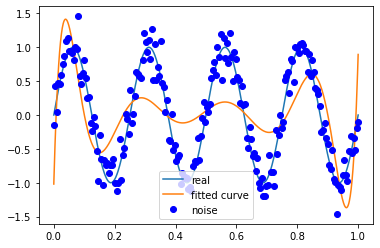

In [4]:
# M=10
p_lsq_0 = fitting(M=10)

### M=30

Fitting Parameters: [ 6.71856463e+05 -1.35216951e+06  5.33794901e+05  1.80562234e+04
  3.58241830e+04 -5.70288501e+05 -6.80730891e+04  3.47684220e+06
 -1.26300125e+06 -1.94562355e+06 -4.86160475e+05 -1.16532703e+06
  9.57968658e+04  2.62361016e+06  1.79797389e+06  3.48495416e+05
 -2.67370774e+06 -2.70971607e+06 -1.09681495e+05  3.95317847e+06
  1.72574881e+06 -3.44567995e+06 -1.67912202e+06  3.68314770e+06
 -1.84182272e+06  3.60595191e+05 -1.07336316e+04 -3.94063268e+03
  1.02805271e+02  2.43173769e+01  9.24927891e-03]


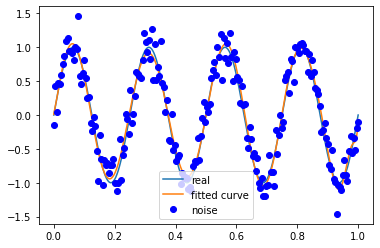

In [5]:
# M=30
p_lsq_1 = fitting(M=30)

### M=50

Fitting Parameters: [ 1.12050596e+05  2.63786204e+05 -4.90572431e+05 -2.96670663e+05
  3.22927364e+05 -8.86481809e+04  5.95717483e+04 -5.41018486e+05
  8.00831092e+05 -5.96604402e+03  5.45402455e+05 -1.21979429e+05
  4.93694872e+05 -4.81661702e+05 -8.39107859e+05 -5.14490773e+05
 -8.16744356e+04 -4.63711552e+05  6.31862794e+05  7.81265336e+05
  2.13998065e+05  3.60036292e+05 -1.34153287e+05  3.90350665e+05
 -1.92996395e+05 -3.31456487e+05 -6.69762843e+05 -5.10563043e+05
  9.83294425e+04 -1.70816882e+05  4.18598570e+05  4.01696526e+05
  6.03359591e+05  6.24099503e+05 -3.37136130e+05 -9.67582036e+05
 -7.89290977e+05  3.12890546e+05  1.91822514e+05  8.94720696e+05
  1.54920914e+05 -6.17198797e+05 -5.43264963e+05  5.01995125e+05
  2.54268112e+05 -3.52982762e+05  1.28610068e+05 -1.93745027e+04
  9.88110479e+02  3.27988360e+00  1.15696911e-01]


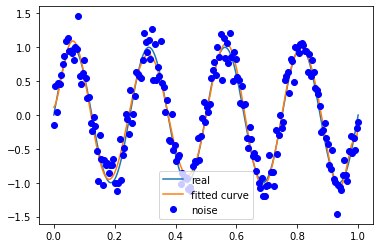

In [6]:
# M=50
p_lsq_3 = fitting(M=50)

### M=180

Fitting Parameters: [-4.75533036e+04 -2.91589337e+04 -1.41872268e+04  1.75871213e+04
  5.03940247e+03  1.79669351e+04 -2.78756715e+04  1.97793348e+04
  2.66513768e+04  2.31715810e+04 -5.00598610e+03 -2.14135742e+03
  1.99690822e+04  1.06910622e+04  3.08505531e+04  5.35356823e+03
  2.75304934e+04  5.21717506e+04  3.02465890e+03 -1.04724768e+04
  2.01069087e+04 -1.60549990e+04  1.83141578e+04 -1.50843866e+04
 -1.23754832e+04 -7.81785677e+03 -4.08522302e+04  1.81374972e+04
 -2.88455635e+04 -1.68157586e+04 -1.65836392e+04  1.26912245e+04
 -2.16326241e+04 -7.30859298e+03 -2.26853686e+04 -4.47499504e+03
 -4.08858067e+03 -3.61074196e+03 -3.18380365e+04 -3.47661202e+04
  1.99696100e+04 -4.15560023e+04 -4.52348232e+03  1.18832884e+03
 -7.45704442e+03 -2.40360514e+04  8.87686883e+03 -2.99837901e+03
  7.96347446e+03 -2.64028007e+04  3.07257842e+04  1.55038317e+04
 -9.81586747e+03 -1.81445107e+03 -1.72733102e+04  2.69860677e+04
  2.06918831e+04  2.03154063e+04 -3.55765571e+03  3.90410538e+04
  1.8

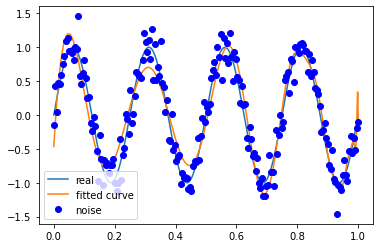

In [7]:
# M=180
p_lsq_9 = fitting(M=180)

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [27]:
regularization = 1e-4


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [28]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

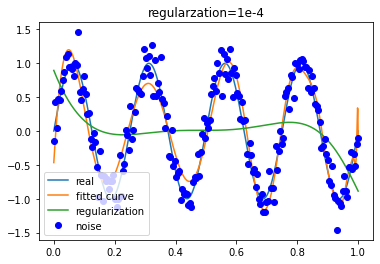

In [29]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
plt.title("regularzation=1e-4")
plt.gcf().savefig("lambda.png")